# Importing the required libraries

In [1]:
import numpy as np # library for linear algebra processing
import matplotlib.pyplot as plt # for plotting the data and images
import cv2 # cv2 helps to work with images
import os # helps to with directories
from random import shuffle # used to shuffle the data randomly
import glob as gb # used to import the image  
import random
from sklearn.model_selection import train_test_split #helps to split the data into training and test set
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score # to calculate the accuracy of the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Acquiring the data

In [2]:
data_dir = "C:\\Users\\14372\\Downloads\\Compressed\\Covid_dataset" # This is the directory of our dataset

In [3]:
covid_dir = data_dir + "\\"+ os.listdir(data_dir)[0]# This is the directory of our covid scans
normal_dir = data_dir + "\\"+ os.listdir(data_dir)[1]# This is the directory of our normal scans
print("Data_directory",data_dir,"\n", "Covid_directory",covid_dir,"\n","Normal_directory",normal_dir)

Data_directory C:\Users\14372\Downloads\Compressed\Covid_dataset 
 Covid_directory C:\Users\14372\Downloads\Compressed\Covid_dataset\Covid 
 Normal_directory C:\Users\14372\Downloads\Compressed\Covid_dataset\Normal


In [4]:
# gb.glob(path) will return the list comprises of all files in the given path
covid_images = len(gb.glob(pathname= data_dir + "\\" + "Covid" + "\\*"))
normal_images = len(gb.glob(pathname= data_dir + "\\" + "Normal" + "\\*"))
print(f"Number of covid positive's X-ray scans: {covid_images} \n", f"Number of Normal patient's X-ray scans:{normal_images}")

Number of covid positive's X-ray scans: 930 
 Number of Normal patient's X-ray scans:1341


In [5]:
y_map = {'Normal': 0, 'Covid': 1} # dict to map covid scans to 1 and normal scans to 0.
def str_code(stri):
    return y_map[stri]

### 1. Reading and resizing the images

In [6]:
def image_arr(d_dir,image_size=224):
    """This function will convert the images to numpy array.
        It take the directory as input and convert all the images in this directory to a multi dimensional numpy array."""
    
    x = []
    y = []
    for folder in os.listdir(d_dir): # loop for the folder
        i=1
        print('{} folders found'.format(len(os.listdir(d_dir))))
        for file in gb.glob(pathname= d_dir + "\\" + folder + "\\*"): # loop for the images
            tot_img = len(gb.glob(pathname= d_dir + "\\" + folder + "\\*"))
            if i==1:
                print('{} images found in {} folder'.format(tot_img, folder))
#             print(file)
            arr = cv2.imread(file,0) # it'll convert the image into numpy array
#             print(arr.shape)
            arr = cv2.resize(arr, dsize = (image_size,image_size)) # resizing it to (224,224)
#             print(arr.shape)
            x.append(arr)
            y.append(str_code(folder)) #Appending 1 for covid, 0 for normal
#             print(np.array(x).shape)
            perc = i/tot_img*100# To print how much processing is completed
            if round(perc,1)%10 ==0:
                  print('{}% of {} images processed'.format(round(perc,1),folder))
            i+=1
            
                
            
    x = np.array(x)
    y = np.array(y)    
    return x,y

    

In [7]:
x,y = image_arr(data_dir)

2 folders found
930 images found in Covid folder
10.0% of Covid images processed
20.0% of Covid images processed
30.0% of Covid images processed
40.0% of Covid images processed
50.0% of Covid images processed
60.0% of Covid images processed
70.0% of Covid images processed
80.0% of Covid images processed
90.0% of Covid images processed
100.0% of Covid images processed
2 folders found
1341 images found in Normal folder
10.0% of Normal images processed
20.0% of Normal images processed
30.0% of Normal images processed
40.0% of Normal images processed
40.0% of Normal images processed
50.0% of Normal images processed
50.0% of Normal images processed
60.0% of Normal images processed
60.0% of Normal images processed
70.0% of Normal images processed
80.0% of Normal images processed
90.0% of Normal images processed
100.0% of Normal images processed


In [8]:
x.shape # (m,num_px, num_px) where m is number of images fo both covid and normal, num_px shows height and weight

(2271, 224, 224)

In [9]:
y.shape# (m,) where m is number of examples

(2271,)

Text(0, 0.5, 'Number of X-ray scans')

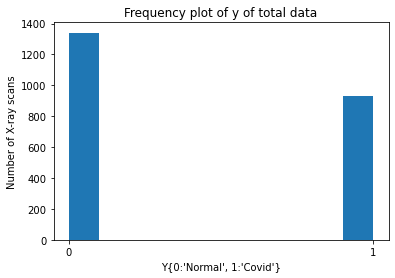

In [53]:
plt.title("Frequency plot of y of total data")
plt.hist(y)
plt.xticks([0,1])
plt.xlabel("Y{0:'Normal', 1:'Covid'}")
plt.ylabel('Number of X-ray scans')

# Exploratory Data Analysis

In [16]:
x_covid = x[:covid_images] #Slicing the array to get covid scans array.
x_normal = x[covid_images:covid_images+normal_images]#Slicing the array to get normal scans array.
y_covid = y[:covid_images]
y_normal = y[covid_images:covid_images+normal_images]

In [18]:
print(x_covid.shape, y_covid.shape,x_normal.shape,y_normal.shape)

(930, 224, 224) (930,) (1341, 224, 224) (1341,)


###      1. Plotting the raw x-ray scans 

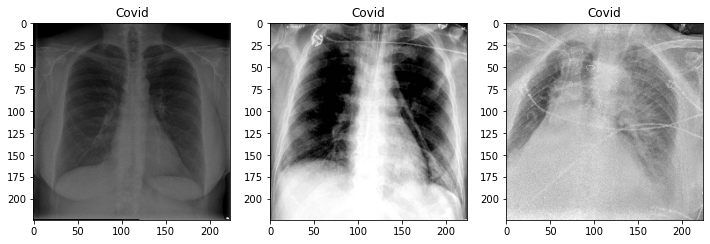

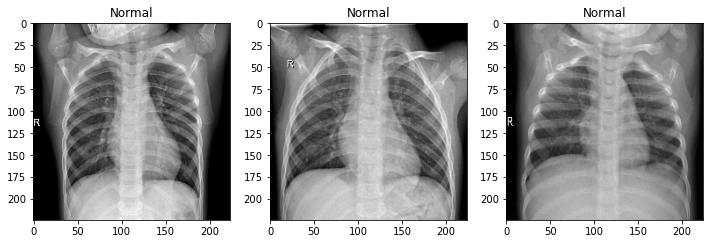

In [17]:
# It'll create a list of three elements choosen randomly from np array
norm_lis = np.random.choice(np.arange(x_normal.shape[0]),3, replace=False)
cov_lis = np.random.choice(np.arange(x_covid.shape[0]),3, replace=False)

for row in range(2):
    plt.figure(figsize=(12,8))
    for col in range(3):
        if row == 0:
            plt.subplot(2,3,col+1)
            plt.imshow(x_covid[cov_lis[col]], cmap = 'gray')
            plt.title('Covid')
        
        else:
            plt.subplot(2,3,col+1)
            plt.imshow(x_normal[norm_lis[col]], cmap = 'gray')
            plt.title('Normal')
            
    plt.show()

### 2.  Mean, difference and Variance Images 

In [19]:
def mean(img_arr, title, size = (224, 224)):
    # this function finds the mean of array with axis =0
    mean_img = np.mean(img_arr, axis = 0)
    mean_img = mean_img.reshape(size)
    return mean_img

def std(img_arr, title, size = (224, 224)):
    # this function finds the std deviation of array with axis =0
    std_img = np.std(img_arr, axis = 0)
    std_img = std_img.reshape(size)
    return std_img

In [20]:
norm_mean = mean(x_normal, 'NORMAL')
covid_mean = mean(x_covid, 'COVID')

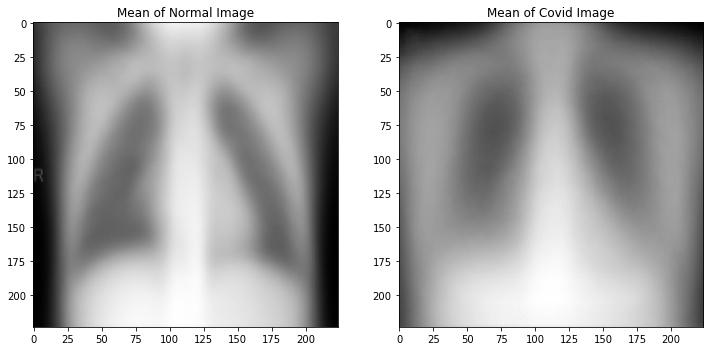

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

ax1.imshow(norm_mean, cmap='gray')
ax1.set_title("Mean of Normal Image")

ax2.imshow(covid_mean, cmap='gray')
ax2.set_title("Mean of Covid Image")

plt.show()

#### The upper images show that mean image of the covid is more blurry than the normal one. 

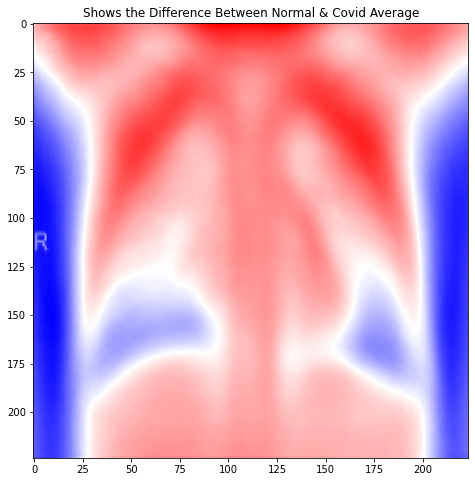

In [22]:
diff_mean = norm_mean - covid_mean
plt.figure(figsize=(12,8))
plt.imshow(diff_mean, cmap='bwr')
plt.title('Shows the Difference Between Normal & Covid Average')
plt.show()

In [23]:
norm_std = std(x_normal, 'NORMAL')
covid_std = std(x_covid, 'COVID')

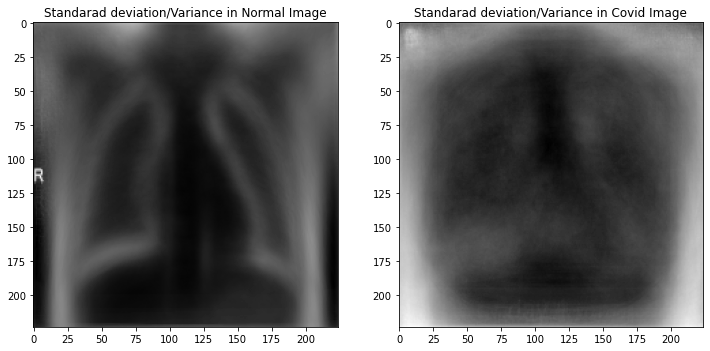

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

ax1.imshow(norm_std, cmap='gray')
ax1.set_title("Standarad deviation/Variance in Normal Image")

ax2.imshow(covid_std, cmap='gray')
ax2.set_title("Standarad deviation/Variance in Covid Image")

plt.show()

# Splitting the data into training and test data

In [25]:
# splits the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42 )

In [26]:
X_train.shape

(1521, 224, 224)

Text(0, 0.5, 'Number of X-ray scans')

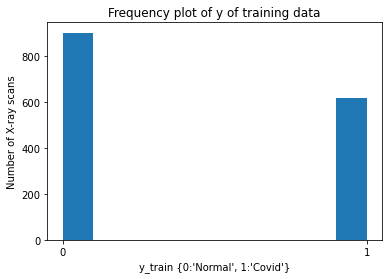

In [54]:
plt.title("Frequency plot of y of training data")
plt.hist(y_train)
plt.xticks([0,1])
plt.xlabel("y_train {0:'Normal', 1:'Covid'}")
plt.ylabel('Number of X-ray scans')

([<matplotlib.axis.XTick at 0x1be690aeb80>,
 [Text(0, 0, ''), Text(0, 0, '')])

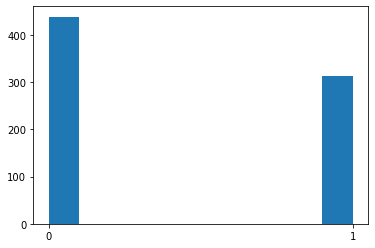

In [31]:
plt.tile("Frequency plot of y of test data")
plt.hist(y_test)
plt.xticks([0,1])
plt.xlabel("y_test {0:'Normal', 1:'Covid'}")
plt.ylabel('Number of X-ray scans')

# Data preprocessing
### 1.  Data Augmentation

In [32]:
class data_aug:
    """data_aug class is used to implement the various augmentation techniques.
        There are several methods in this class which help to implement this."""
    def __init__(self,img):
        self.img = img
        
    def vertical_flip(self,flag):#If flag is true it'll flip the image vertically
        if flag:
            new_img = cv2.flip(self.img, 0)
            return new_img
        else:
            return self.img
        
    def horizontal_flip(self,flag):#If flag is true it'll flip the image horizontally
        if flag:
            new_img = cv2.flip(self.img, 1)
            return new_img
        else:
            return self.img
        
    def horizontal_shift(self, ratio=0.0):# This method will perform horizontal shit by using ratio.
        if ratio > 1 or ratio < 0:
            print('Value should be less than 1 and greater than 0')
            return self.img
        ratio = random.uniform(-ratio, ratio)# It'll pick the a number randomly from a uniform dist. between -ratio to ratio.
        h, w = self.img.shape[:2]
        to_shift = w*ratio# how much percentage of width we want to shift
        if ratio > 0:
            new_img = self.img[:, :int(w-to_shift)]# Full height but width from o to (1-ratio)*w
        if ratio < 0:
            new_img = self.img[:, int(-1*to_shift):]# Full height but width from ratio*w till last pixel.
        new_img = cv2.resize(new_img, (h, w), interpolation = cv2.INTER_CUBIC)# interpolation is a use to fill the shifted pixels
        return new_img
    
    def vertical_shift(self, ratio=0.0):# it's almost similar to horizontal shift but we'll work on height here.
        if ratio > 1 or ratio < 0:
            print('Value should be less than 1 and greater than 0')
            return self.img
        ratio = random.uniform(-ratio, ratio)
        h, w = self.img.shape[:2]
        to_shift = h*ratio
        if ratio > 0:
            new_img = self.img[:int(h-to_shift), :]
        if ratio < 0:
            new_img = self.img[int(-1*to_shift):, :]
        new_img = cv2.resize(new_img, (h, w), interpolation = cv2.INTER_CUBIC)
        return new_img
    
    def rotation(self, angle):# Rotate the image by the angle specified
        angle = int(random.uniform(-angle, angle))
        h, w = self.img.shape[:2]
        M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
        new_img = cv2.warpAffine(self.img, M, (w, h))
        return new_img
    
    def zoom(self, value): #zoom the image
        if value > 1 or value < 0:
            print('Value for zoom should be less than 1 and greater than 0')
            return self.img
        value = random.uniform(value, 1)
        h, w = self.img.shape[:2]
        h_taken = int(value*h)
        w_taken = int(value*w)
        h_start = random.randint(0, h-h_taken)# choose a random starting point for the image in between 0 and h-h_taken
        w_start = random.randint(0, w-w_taken)# choose a random starting point for the image in between 0 and h-h_taken
        new_img = self.img[h_start:h_start+h_taken, w_start:w_start+w_taken]# slicing of input image array height as well width
         #                                                                                                                wise.
        new_img = cv2.resize(new_img, (h, w), interpolation = cv2.INTER_CUBIC)
        return new_img
    
    def brightness(self, low, high):# adjust the brightness of image
        value = random.uniform(low, high)
        img_bgr = cv2.cvtColor(self.img, cv2.COLOR_GRAY2BGR)# we can't directly convert the gray image into BGR
        hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)# HSV is hue,saturation,value. Value is responsible for lighting in  image
        hsv = np.array(hsv, dtype = np.float64)
        hsv[:,:,1] = hsv[:,:,1]*value
        hsv[:,:,1][hsv[:,:,1]>255]  = 255
        hsv[:,:,2] = hsv[:,:,2]*value 
        hsv[:,:,2][hsv[:,:,2]>255]  = 255# it'll make bright pixels more bright
        hsv = np.array(hsv, dtype = np.uint8)
        new_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
        return new_img

In [33]:
x_train_aug = []
y_train_aug = []
tot_img = X_train.shape[0]
i=1
print('{} images found in training dataset'.format(tot_img))
for i in range(tot_img):
    """This loop take each image from X_train, and use the methods from img_aug class for data augmentation.
        Here we have taken the data augmentation only for the training dataset, and it'll help to reduce the overfitting.
        As there are large number of features(50176) and less number of observations/examples in our dataset"""
    img_aug = data_aug(X_train[i])
    x_train_aug.append(img_aug.vertical_flip(True))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.horizontal_flip(True))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.vertical_shift(0.2))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.horizontal_shift(0.2))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.zoom(0.2))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.rotation(30))
    y_train_aug.append(y_train[i])
    x_train_aug.append(img_aug.brightness(0.5,2))
    y_train_aug.append(y_train[i])
    perc = i/tot_img*100
    if round(perc,1)%10 ==0:
         print('{}% of training images processed'.format(round(perc,1)))
    i+=1



1521 images found in training dataset
0.0% of training images processed
10.0% of training images processed
20.0% of training images processed
30.0% of training images processed
30.0% of training images processed
40.0% of training images processed
40.0% of training images processed
50.0% of training images processed
50.0% of training images processed
60.0% of training images processed
60.0% of training images processed
70.0% of training images processed
70.0% of training images processed
80.0% of training images processed
90.0% of training images processed


In [34]:
np.array(y_train_aug).shape

(10647,)

In [24]:
np.array(x_train_aug).shape

(10647, 224, 224)

Text(0, 0.5, 'Number of X-ray scans')

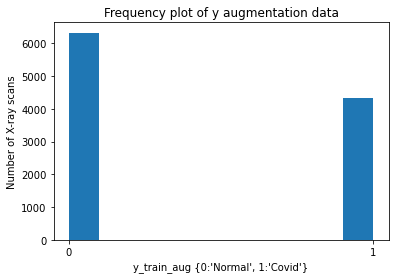

In [55]:
plt.title("Frequency plot of y augmentation data")
plt.hist(y_train_aug)
plt.xticks([0,1])
plt.xlabel("y_train_aug {0:'Normal', 1:'Covid'}")
plt.ylabel('Number of X-ray scans')

### X-ray scans after data augmentation

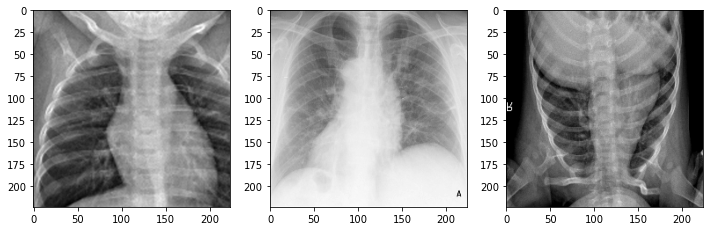

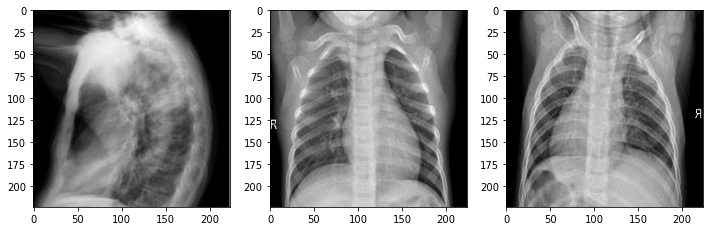

In [56]:
aug_lis = np.random.choice(np.arange(np.array(x_train_aug).shape[0]),6, replace=False)
for row in range(2):
    plt.figure(figsize=(12,8))
    for col in range(3):
        if row == 0:
            plt.subplot(2,3,col+1)
            plt.imshow(np.array(x_train_aug)[aug_lis[col]], cmap = 'gray')
        
        else:
            plt.subplot(2,3,col+1)
            plt.imshow(np.array(x_train_aug)[aug_lis[col+3]], cmap = 'gray')
            
    plt.show()
    


In [37]:
X_train = np.concatenate([X_train,np.array(x_train_aug)], axis =0)# concatenating the augmanted data and training data.
Y_train = np.concatenate([y_train,np.array(y_train_aug)], axis =0)

Text(0, 0.5, 'Number of X-ray scans')

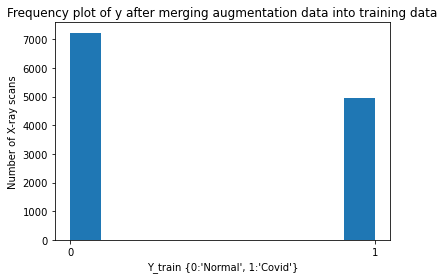

In [57]:
plt.title("Frequency plot of y after merging augmentation data into training data")
plt.hist(Y_train)
plt.xticks([0,1])
plt.xlabel("Y_train {0:'Normal', 1:'Covid'}")
plt.ylabel('Number of X-ray scans')

### 2. Reshaping and Rescaling

In [38]:
def shap_scal(arr):
    """This function helps to rescaling and reshaping"""
    # converts matrix of order (m, num_px, num_px) into feature vector (m, , num_px*num_px), required for ML algorithms.
    x_feat = arr.reshape(arr.shape[0],-1)
    x_resc = x_feat/255 #Scaling the features in between[0,1]
    return x_resc

In [39]:
x_train = shap_scal(X_train)
x_test = shap_scal(X_test)
print(x_train.shape,Y_train.shape, x_test.shape, y_test.shape)

(12168, 50176) (12168,) (750, 50176) (750,)


# Modelling Approach

In [41]:
model = LogisticRegression(penalty='l2', C = 0.2, max_iter= 100, n_jobs=-1)
"""As the number of parameters are very large, regularization(L2) is used to reduce the overfitting.
Lower the value of c, overfitting decreases."""

In [42]:
model.fit(x_train, Y_train)

LogisticRegression(C=0.2, n_jobs=-1)

In [43]:
pred = model.predict(x_test)

In [44]:
accuracy_score(y_test, pred)

0.9373333333333334

In [45]:
from sklearn.svm import SVC

In [46]:
model2 = SVC(C = 0.2, kernel= 'rbf', )# Gaussian kernel is used as it can help to find the highly non linear boundaries.

In [49]:
model2.fit(x_train, Y_train)

SVC(C=0.2)

In [51]:
pred2 = model2.predict(x_test)

accuracy_score(y_test, pred2)

0.976

# Future Plans

### 1. Try to find the hyperparametrs of the model that have been used here by hyperparameter tuning.
### 2. Try to fit the other machine learning models such as Decision Tree classifien, Gasussian Naive Bayes classifier
### 3. Try to fit the deep learning models such as VGG16, RESNET 18.
### 4. After this, we will compare the upper said models by using difeerent metrics like accuracy_score, confusion matrix etc.


# Refrences:
### 1. Vardan Agarwal 2020. Complete Image Augmentation in OpenCV retrived from https://towardsdatascience.com/complete-image-augmentation-in-opencv-31a6b02694f5
### 2. Eunjoo Beyon 2020. Exploratory Data Analysis Ideas for Image Classification retrived from https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2